# MOD_07_2 Introduction à Data Science
# ====================================================================================================================================

## 1.Implémentation des méthodes ID3, C4.5 et CART

### Pour réaliser ça, on va utliluser Chefboost qu' est un framework d'arbre de décision sous Python

In [25]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from chefboost import Chefboost as chef  


In [7]:
df=pd.read_csv("weather .csv")
df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


### Split the Dataset into training and testing set

In [10]:
df.sample(frac=1)   # to shuffle the dataset
df_train=df[0:9]
df_test=df[9:13]

### Create a function that train and evaluate your model

In [20]:
def algorithm(alg,df_train,df_test):
    print("=======================Train Model==============================")
    config = {'algorithm': alg}
    model = chef.fit(df_train, config = config, target_label = df_train.columns[-1])
    print("======================Evaluate Model============================")
    chef.evaluate(model,df_test,target_label=df_train.columns[-1])
    return model

### ID3, C4.5 and CART

In [22]:
model=algorithm("ID3",df_train,df_test)   
# model=algorithm("C4.5",df_train,df_test)  
# model=algorithm("CART",df_train,df_test)    

=======================Train Model==============================
[INFO]:  2 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  3.043043375015259  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  9  instances
Labels:  ['no' 'yes']
Confusion matrix:  [[4, 0], [0, 5]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
======================Evaluate Model============================
-------------------------
Evaluate  test set
-------------------------
Accuracy:  75.0 % on  4  instances
Labels:  ['yes']
Confusion matrix:  [[3]]
Precision:  100.0 %, Recall:  75.0 %, F1:  85.7143 %


#### Prediction

In [23]:
prediction = chef.predict(model, param = ['rainy', 'cool', 'normal', True])
prediction

'no'

## 2.Using a sklearn library to implement decision tree algorithms with GINI and ENTROPY indexes

In [26]:
# import category encoders
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# ENCODER
def encoder(df): # cette fonction encode notre dataset et renvoie X_train,X_test,y_train,y_test
    X = df.drop([df.columns[-1]], axis=1)
    y = df[df.columns[-1]]
    # split X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
    # encode variables with ordinal encoding
    col=[]
    for i in range(len(df.columns)-1):
        col.append(df.columns[i])
    encoder = ce.OrdinalEncoder(cols=col)
    x_train = encoder.fit_transform(X_train)
    x_test = encoder.transform(X_test)
    return x_train,x_test,y_train,y_test,X_train

In [30]:
# ENTRAINER
def entrainer(x_train,y_train,index): # inde= 'gini' or 'entropy'
    # Entrainement du modele
    model= DecisionTreeClassifier(criterion=index, max_depth=3, random_state=0)
    model.fit(x_train, y_train)
    return model


In [43]:
# PLOT
def plot_tree(df,model):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=200)
    tree.plot_tree(model,
                feature_names = df.columns[0:-1], 
                class_names=df[df.columns[-1]].unique(),
                filled = True)

In [33]:
x_train,x_test,y_train,y_test,X_train=encoder(df)
model=entrainer(x_train,y_train,'gini')    # we can choose also entropy
print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.6000


### This function enable us to know the encoded value for each value

In [51]:
def encoded_value():
    l=[]  # this list contains the all encoded value 
    a=[]
    for i in range(x_train.shape[1]):
        val_not_enoded=X_train[X_train.columns[i]].unique()
        val_encoded=np.sort(x_train[x_train.columns[i]].unique())
        for j in range(len(val_not_enoded)):
            if val_not_enoded[j]==str:
                l.append([val_not_enoded[j],val_encoded[j]])
            else:
                l.append([str(val_not_enoded[j]),val_encoded[j]])
    params=['rainy','cool','high',str(True)]
    for i in range(len(params)):
        for j in range(len(l)):
            if params[i] in l[j]:
                #print(params[i],l[j])
                a.append(l[j][1])
                break
    print(l)

In [52]:
encoded_value()

[['sunny', 1], ['overcast', 2], ['rainy', 3], ['cool', 1], ['hot', 2], ['mild', 3], ['normal', 1], ['high', 2], ['False', 1], ['True', 2]]


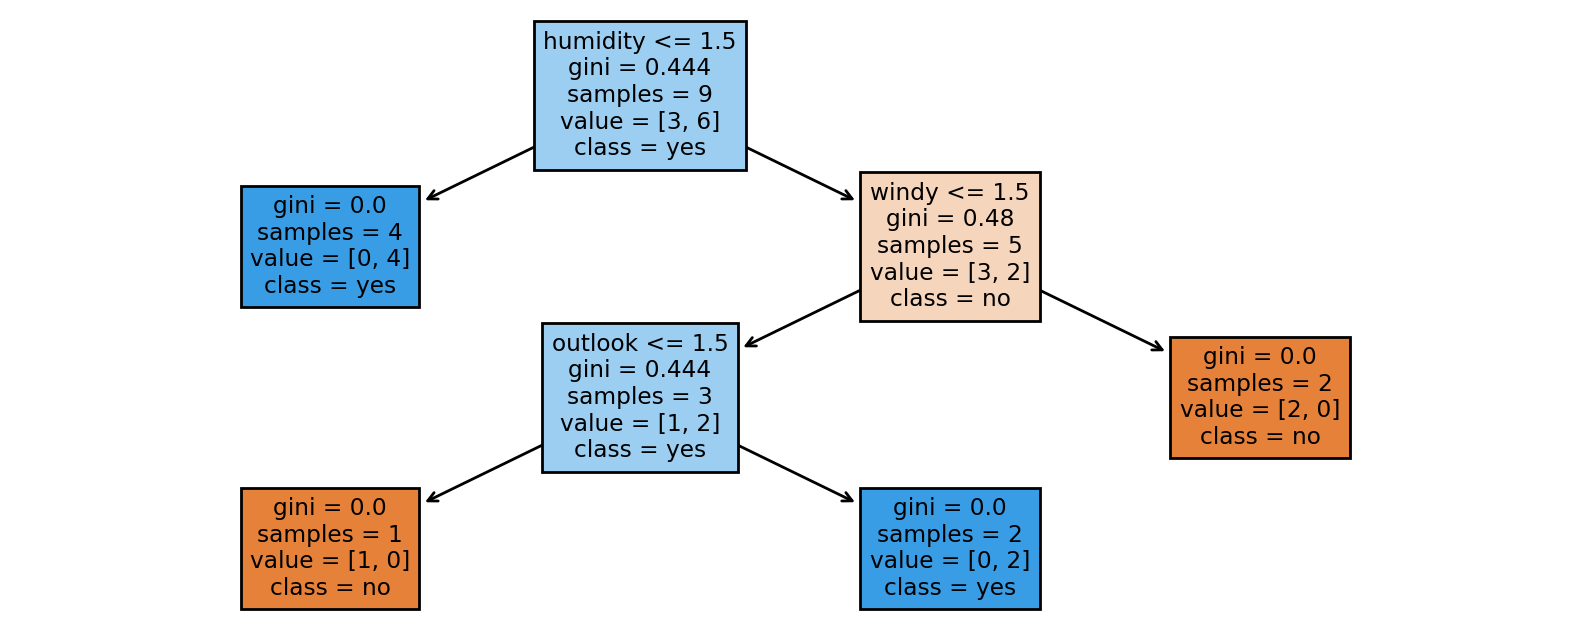

In [44]:
plot_tree(df,model)

## 3.NAIVE BAYES

In [53]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(x_train,y_train)

GaussianNB()

In [54]:
print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.7778
Test set score: 0.6000
